In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:45<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


Train Path: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train
Test Path: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test
Validation Path: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val
Checking folder: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train
Subfolders: ['PNEUMONIA', 'NORMAL']
--------------------------------------------------
Checking folder: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test
Subfolders: ['PNEUMONIA', 'NORMAL']
--------------------------------------------------
Checking folder: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val
Subfolders: ['PNEUMONIA', 'NORMAL']
--------------------------------------------------
Found 5216 images belonging to 2 classes.
Found 624 images b

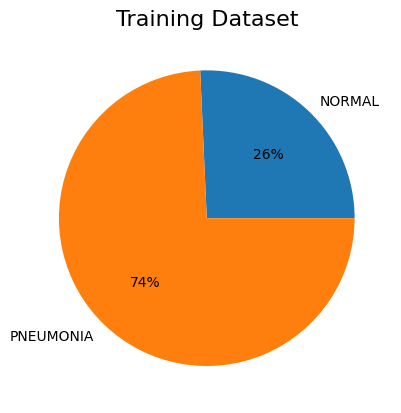

Dataset Characteristics of Train Data Set:
Number of images: 5216
Number of normal images: 1341
Number of pneumonia images: 3875

Dataset Characteristics of Test Data Set:
Number of images: 624
Number of normal images: 234
Number of pneumonia images: 390

Dataset Characteristics of Validation Data Set:
Number of images: 16
Number of normal images: 8
Number of pneumonia images: 8

Class Weights: {0: 1.9448173005219984, 1: 0.6730322580645162}
Sample images from Training Data


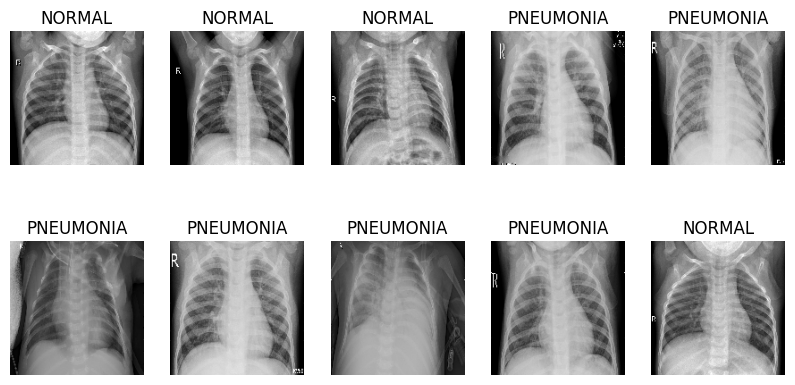

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

dataset_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path, "val")

print("Train Path:", train_path)
print("Test Path:", test_path)
print("Validation Path:", val_path)

for folder_path in [train_path, test_path, val_path]:
    print(f"Checking folder: {folder_path}")
    print("Subfolders:", os.listdir(folder_path))
    print("-" * 50)

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

class_names = list(class_indices.keys())
print("Class Names:", class_names)

frequency = np.unique(train_generator.classes, return_counts=True)

plt.title("Training Dataset", fontsize=16)
plt.pie(frequency[1], labels=class_names, autopct='%1.0f%%')
plt.show()

def dataset_statistics(generator, name):
    print(f"Dataset Characteristics of {name} Data Set:")
    print("Number of images:", len(generator.classes))
    print("Number of normal images:", len([label for label in generator.classes if label == 0]))
    print("Number of pneumonia images:", len([label for label in generator.classes if label == 1]))
    print()

dataset_statistics(train_generator, "Train")
dataset_statistics(test_generator, "Test")
dataset_statistics(val_generator, "Validation")

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
print("Class Weights:", class_weights)

print('Sample images from Training Data')
img, label = next(train_generator)

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[int(label[i])])
plt.show()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Train Generator Information:
Number of samples in train: 5216
Number of classes in train: 2
Validation Generator Information:
Number of samples in validation: 16
Number of classes in validation: 2
Test Generator Information:
Number of samples in test: 624
Number of classes in test: 2


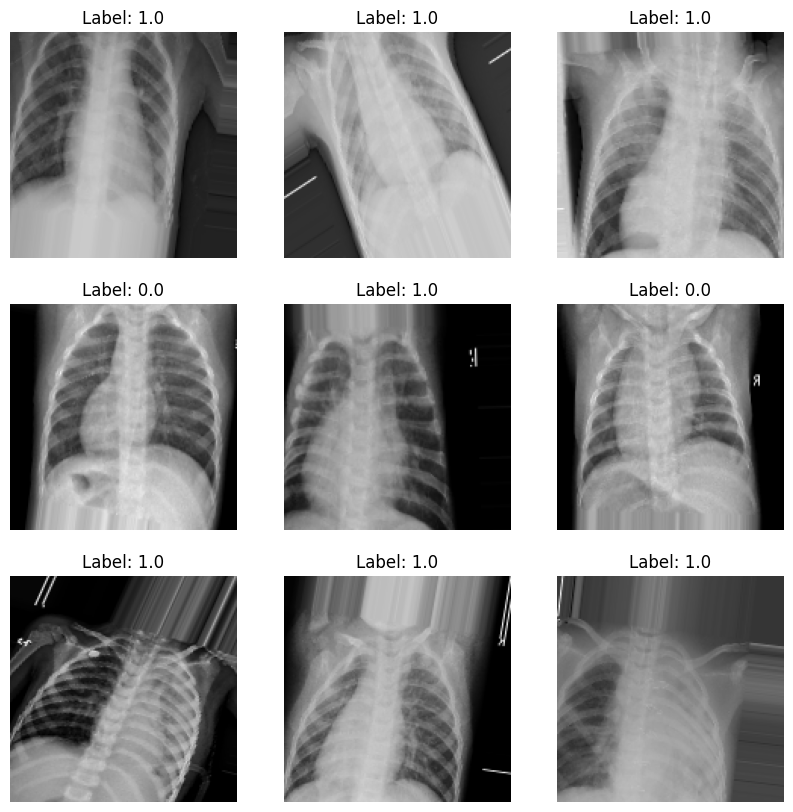

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    directory="/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory="/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Train Generator Information:")
print("Number of samples in train:", len(train_generator.classes))
print("Number of classes in train:", len(train_generator.class_indices))

print("Validation Generator Information:")
print("Number of samples in validation:", len(validation_generator.classes))
print("Number of classes in validation:", len(validation_generator.class_indices))

print("Test Generator Information:")
print("Number of samples in test:", len(test_generator.classes))
print("Number of classes in test:", len(test_generator.class_indices))

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.title(f"Label: {y_batch[i]}")
plt.show()


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 571ms/step - accuracy: 0.8311 - loss: 0.4861 - val_accuracy: 0.8830 - val_loss: 0.2675
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 467ms/step - accuracy: 0.9238 - loss: 0.1803 - val_accuracy: 0.8910 - val_loss: 0.2677
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 467ms/step - accuracy: 0.9285 - loss: 0.1770 - val_accuracy: 0.8894 - val_loss: 0.2961
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 471ms/step - accuracy: 0.9308 - loss: 0.1641 - val_accuracy: 0.9022 - val_loss: 0.2806
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 459ms/step - accuracy: 0.9414 - loss: 0.1529 - val_accuracy: 0.9054 - val_loss: 0.2829
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 468ms/step - accuracy: 0.9453 - loss: 0.1476 - val_accuracy: 0.8814 - val_loss: 0.3757
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 464ms/step - accuracy: 0.9372 - loss: 0.1593 - val_accuracy: 0.9263 - val_loss: 0.2261
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 462ms/step - accuracy: 0.9450 - loss: 0.1384 - va

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_labels = test_generator.classes
predictions = model.predict(test_generator)
predictions = (predictions > 0.5).astype('int32')

precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step
Precision: 0.9194
Recall: 0.9359
F1 Score: 0.9276


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step
AUC: 0.9632


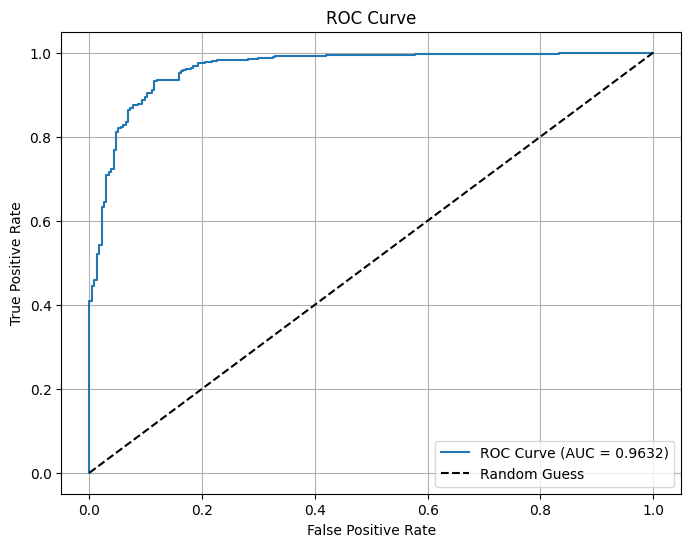

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = test_generator.classes
y_pred = model.predict(test_generator).ravel()
y_pred_binary = (y_pred > 0.5).astype('int32')

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

print(f"AUC: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

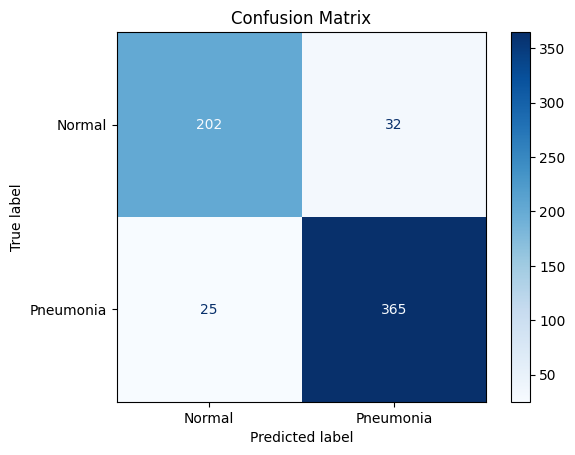

In [9]:
cm = confusion_matrix(y_true, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


CAM

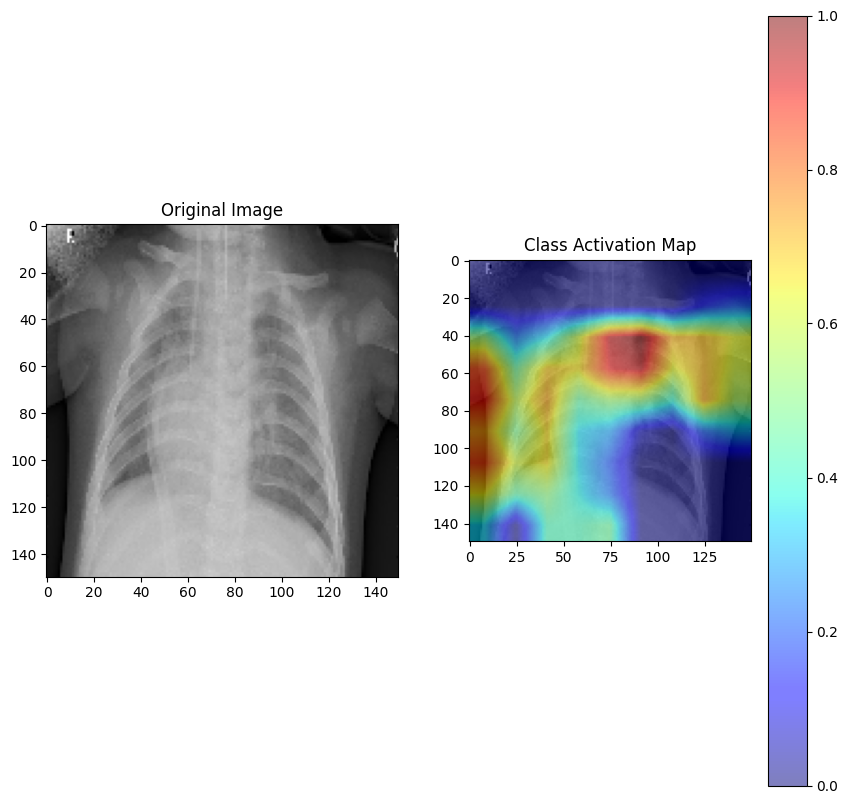

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

sample_image, sample_label = next(test_generator)

img = np.expand_dims(sample_image[0], axis=0)

img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

last_conv_layer = model.get_layer('block5_conv3')

grad_model = tf.keras.Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    conv_output, predictions = grad_model(img_tensor)
    class_idx = tf.argmax(predictions[0])
    class_output = predictions[:, class_idx]

grads = tape.gradient(class_output, conv_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_output = conv_output[0]

cam = np.dot(conv_output, pooled_grads.numpy())

cam = np.maximum(cam, 0)
cam = cv2.resize(cam, (sample_image[0].shape[1], sample_image[0].shape[0]))
cam = cam / np.max(cam)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(sample_image[0])
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title(f"Class Activation Map")
plt.colorbar()
plt.show()


Grad-CAM

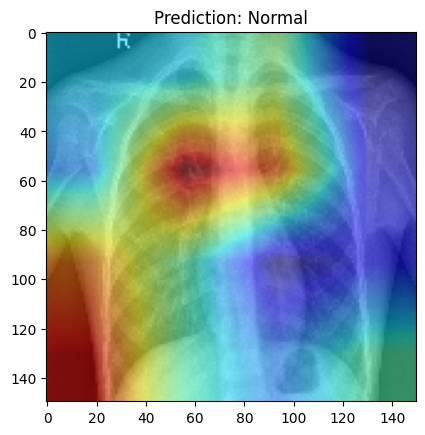

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

grad_model = tf.keras.Model(inputs=model.input, outputs=[model.output, base_model.output])

sample_image, sample_label = next(test_generator)

img = np.expand_dims(sample_image[0], axis=0)

img_tensor = tf.convert_to_tensor(img)

with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    predictions, features = grad_model(img_tensor)
    loss = predictions[0]

grads = tape.gradient(loss, features)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_output = features[0]

cam = np.ones_like(conv_output[:, :, 0])
for i in range(512):
    cam += pooled_grads[i] * conv_output[:, :, i]

cam = cv2.resize(cam.numpy(), (150, 150))
cam = np.maximum(cam, 0)
heatmap = cam / np.max(cam)

plt.imshow(sample_image[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title(f"Prediction: {'Pneumonia' if predictions[0] > 0.5 else 'Normal'}")
plt.show()


OTHERS

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(512, activation='relu')(x_resnet)
x_resnet = Dense(1, activation='sigmoid')(x_resnet)

model_resnet = Model(inputs=base_model_resnet.input, outputs=x_resnet)

for layer in base_model_resnet.layers:
    layer.trainable = False

model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history_resnet = model_resnet.fit(train_generator, epochs=10, validation_data=test_generator)

test_labels_resnet = test_generator.classes
predictions_resnet = model_resnet.predict(test_generator)
predictions_resnet = (predictions_resnet > 0.5).astype('int32')

precision_resnet = precision_score(test_labels_resnet, predictions_resnet)
recall_resnet = recall_score(test_labels_resnet, predictions_resnet)
f1_resnet = f1_score(test_labels_resnet, predictions_resnet)

print(f"ResNet50 - Precision: {precision_resnet:.4f}, Recall: {recall_resnet:.4f}, F1: {f1_resnet:.4f}")


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 502ms/step - accuracy: 0.6906 - loss: 1.2855 - val_accuracy: 0.7516 - val_loss: 0.5261
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.7701 - loss: 0.4707 - val_accuracy: 0.6939 - val_loss: 0.5380
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 536ms/step - accuracy: 0.7953 - loss: 0.4255 - val_accuracy: 0.6731 - val_loss: 0.5643
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 465ms/step - accuracy: 0.7974 - loss: 0.4179 - val_accuracy: 0.7179 - val_loss: 0.5005
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 459ms/step - accuracy: 0.8067 - loss: 0.3932 - val_accuracy: 0.7756 - val_loss: 0.4539
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 455ms/step - accuracy: 0.8129 - loss: 0.3966 - val_accuracy: 0.8013 - val_loss: 0.4617
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 455ms/step - accuracy: 0.8213 - loss: 0.3683 - val_accuracy: 0.6651 - val_loss: 0.6859
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.8162 - loss: 

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(512, activation='relu')(x_inception)
x_inception = Dense(1, activation='sigmoid')(x_inception)

model_inception = Model(inputs=base_model_inception.input, outputs=x_inception)

for layer in base_model_inception.layers:
    layer.trainable = False

model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history_inception = model_inception.fit(train_generator, epochs=10, validation_data=test_generator)

test_labels_inception = test_generator.classes
predictions_inception = model_inception.predict(test_generator)
predictions_inception = (predictions_inception > 0.5).astype('int32')

precision_inception = precision_score(test_labels_inception, predictions_inception)
recall_inception = recall_score(test_labels_inception, predictions_inception)
f1_inception = f1_score(test_labels_inception, predictions_inception)

print(f"InceptionV3 - Precision: {precision_inception:.4f}, Recall: {recall_inception:.4f}, F1: {f1_inception:.4f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 512ms/step - accuracy: 0.7994 - loss: 4.9943 - val_accuracy: 0.8349 - val_loss: 0.6837
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 454ms/step - accuracy: 0.8894 - loss: 0.4100 - val_accuracy: 0.8494 - val_loss: 0.6244
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 435ms/step - accuracy: 0.9189 - loss: 0.2359 - val_accuracy: 0.8718 - val_loss: 0.3663
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 435ms/step - accuracy: 0.9289 - loss: 0.1796 - val_accuracy: 0.7997 - val_loss: 0.6638
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 442ms/step - accuracy: 0.9249 - loss: 0.1850 - val_accuracy: 0.8622 - val_loss: 0.4155
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 454ms/step - accuracy: 0.9293 - loss: 0.1650 - val_accuracy: 0.8221 - val_loss: 0.5794
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 473ms/step - accuracy: 0.9256 - loss: 0.1980 - val_accuracy: 0.8702 - val_loss: 0.3567
Epoch 8/10
163/163 ━━━━━━━━━━━

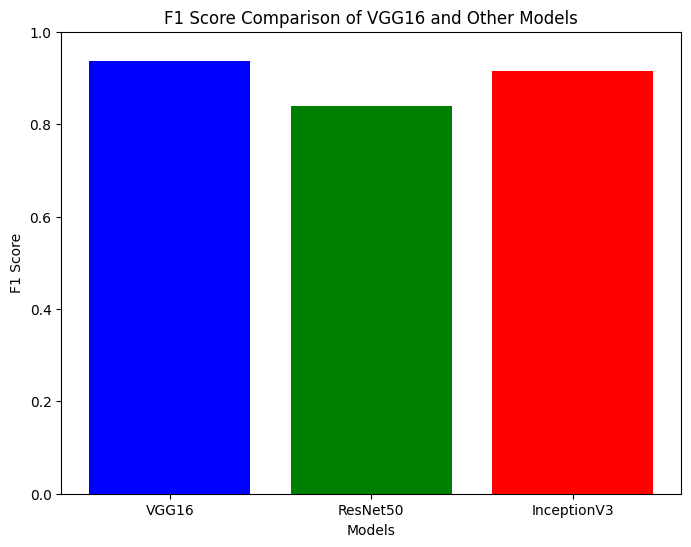

VGG16 F1 Score: 0.9365
ResNet50 F1 Score: 0.8402
InceptionV3 F1 Score: 0.9148


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

f1_scores = [f1, f1_resnet, f1_inception]

models = ['VGG16', 'ResNet50', 'InceptionV3']

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('F1 Score Comparison of VGG16 and Other Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim([0, 1])
plt.show()

print(f"VGG16 F1 Score: {f1:.4f}")
print(f"ResNet50 F1 Score: {f1_resnet:.4f}")
print(f"InceptionV3 F1 Score: {f1_inception:.4f}")
